### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

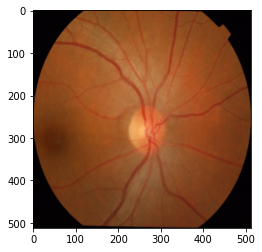

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
lab_b_channel_train = convert_to_lab(2, img_train)
len(lab_b_channel_train)

50

### Test images

In [5]:
lab_b_channel_test = convert_to_lab(2, img_test)
len(lab_b_channel_test)

51

#### Generator of augmented data:

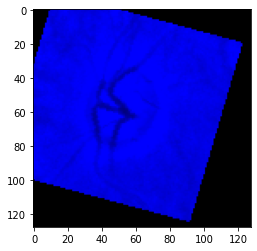

In [6]:
gen = data_generator(lab_b_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


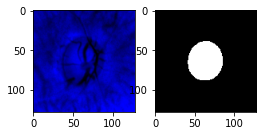

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(lab_b_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE

model = create_compile_model(img_size)
history_cup = train(lab_b_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_lab_b', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 67s 637ms/step - loss: 1.6530 - mean_IOU_gpu: 0.0564 - dice_metric: 0.1050 - val_loss: 1.4727 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 66s 667ms/step - loss: 1.5809 - mean_IOU_gpu: 0.0021 - dice_metric: 0.0041 - val_loss: 1.4436 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 66s 671ms/step - loss: 1.5222 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.4110 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 67s 677ms/step - loss: 1.4906 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.3642 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 68s 686ms/step - loss: 1.4137 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.30

99/99 [==============================] - 61s 619ms/step - loss: 0.5624 - mean_IOU_gpu: 0.3683 - dice_metric: 0.5006 - val_loss: 0.6813 - val_mean_IOU_gpu: 0.0594 - val_dice_metric: 0.0984
Epoch 41/500
99/99 [==============================] - 61s 616ms/step - loss: 0.4325 - mean_IOU_gpu: 0.4755 - dice_metric: 0.6265 - val_loss: 0.6975 - val_mean_IOU_gpu: 0.0025 - val_dice_metric: 0.0047
Epoch 42/500
99/99 [==============================] - 61s 613ms/step - loss: 0.3653 - mean_IOU_gpu: 0.5175 - dice_metric: 0.6655 - val_loss: 0.6528 - val_mean_IOU_gpu: 0.1276 - val_dice_metric: 0.1864
Epoch 43/500
99/99 [==============================] - 65s 654ms/step - loss: 0.3735 - mean_IOU_gpu: 0.5099 - dice_metric: 0.6608 - val_loss: 0.3495 - val_mean_IOU_gpu: 0.4927 - val_dice_metric: 0.6218
Epoch 44/500
99/99 [==============================] - 63s 642ms/step - loss: 0.3728 - mean_IOU_gpu: 0.5141 - dice_metric: 0.6619 - val_loss: 0.5831 - val_mean_IOU_gpu: 0.1639 - val_dice_metric: 0.2326
Epoch 45

Epoch 81/500
99/99 [==============================] - 60s 609ms/step - loss: 0.2952 - mean_IOU_gpu: 0.5591 - dice_metric: 0.7039 - val_loss: 0.4507 - val_mean_IOU_gpu: 0.3029 - val_dice_metric: 0.4223
Epoch 82/500
99/99 [==============================] - 59s 601ms/step - loss: 0.2901 - mean_IOU_gpu: 0.5628 - dice_metric: 0.7064 - val_loss: 0.3063 - val_mean_IOU_gpu: 0.5321 - val_dice_metric: 0.6700
Epoch 83/500
99/99 [==============================] - 59s 600ms/step - loss: 0.3121 - mean_IOU_gpu: 0.5504 - dice_metric: 0.6972 - val_loss: 0.4685 - val_mean_IOU_gpu: 0.2789 - val_dice_metric: 0.3950
Epoch 84/500
99/99 [==============================] - 62s 626ms/step - loss: 0.2979 - mean_IOU_gpu: 0.5658 - dice_metric: 0.7071 - val_loss: 0.3765 - val_mean_IOU_gpu: 0.4127 - val_dice_metric: 0.5501
Epoch 85/500
99/99 [==============================] - 59s 598ms/step - loss: 0.2777 - mean_IOU_gpu: 0.5792 - dice_metric: 0.7198 - val_loss: 0.3091 - val_mean_IOU_gpu: 0.5530 - val_dice_metric: 0.

Epoch 122/500
99/99 [==============================] - 62s 621ms/step - loss: 0.2541 - mean_IOU_gpu: 0.6029 - dice_metric: 0.7399 - val_loss: 0.3401 - val_mean_IOU_gpu: 0.4828 - val_dice_metric: 0.6246
Epoch 123/500
99/99 [==============================] - 64s 642ms/step - loss: 0.2129 - mean_IOU_gpu: 0.6377 - dice_metric: 0.7717 - val_loss: 0.2509 - val_mean_IOU_gpu: 0.6265 - val_dice_metric: 0.7453
Epoch 124/500
99/99 [==============================] - 61s 622ms/step - loss: 0.2832 - mean_IOU_gpu: 0.5785 - dice_metric: 0.7191 - val_loss: 0.2832 - val_mean_IOU_gpu: 0.5836 - val_dice_metric: 0.7133
Epoch 125/500
99/99 [==============================] - 63s 634ms/step - loss: 0.2670 - mean_IOU_gpu: 0.5898 - dice_metric: 0.7295 - val_loss: 0.3601 - val_mean_IOU_gpu: 0.4583 - val_dice_metric: 0.5978
Epoch 126/500
99/99 [==============================] - 63s 634ms/step - loss: 0.2689 - mean_IOU_gpu: 0.5835 - dice_metric: 0.7248 - val_loss: 0.2717 - val_mean_IOU_gpu: 0.6279 - val_dice_metri

99/99 [==============================] - 62s 620ms/step - loss: 0.2502 - mean_IOU_gpu: 0.6024 - dice_metric: 0.7418 - val_loss: 0.2464 - val_mean_IOU_gpu: 0.6629 - val_dice_metric: 0.7822
Epoch 163/500
99/99 [==============================] - 61s 615ms/step - loss: 0.2688 - mean_IOU_gpu: 0.5910 - dice_metric: 0.7303 - val_loss: 0.2734 - val_mean_IOU_gpu: 0.6042 - val_dice_metric: 0.7352
Epoch 164/500
99/99 [==============================] - 60s 610ms/step - loss: 0.2500 - mean_IOU_gpu: 0.6013 - dice_metric: 0.7415 - val_loss: 0.2471 - val_mean_IOU_gpu: 0.6622 - val_dice_metric: 0.7837
Epoch 165/500
99/99 [==============================] - 61s 620ms/step - loss: 0.2434 - mean_IOU_gpu: 0.6221 - dice_metric: 0.7549 - val_loss: 0.2602 - val_mean_IOU_gpu: 0.6115 - val_dice_metric: 0.7458
Epoch 166/500
99/99 [==============================] - 62s 625ms/step - loss: 0.2375 - mean_IOU_gpu: 0.6130 - dice_metric: 0.7505 - val_loss: 0.2584 - val_mean_IOU_gpu: 0.6362 - val_dice_metric: 0.7556
Epoc

Epoch 203/500
99/99 [==============================] - 42s 428ms/step - loss: 0.2541 - mean_IOU_gpu: 0.6056 - dice_metric: 0.7428 - val_loss: 0.2301 - val_mean_IOU_gpu: 0.6443 - val_dice_metric: 0.7751
Epoch 204/500
99/99 [==============================] - 42s 424ms/step - loss: 0.2438 - mean_IOU_gpu: 0.6026 - dice_metric: 0.7436 - val_loss: 0.2262 - val_mean_IOU_gpu: 0.6583 - val_dice_metric: 0.7842
Epoch 205/500
99/99 [==============================] - 42s 425ms/step - loss: 0.2335 - mean_IOU_gpu: 0.6163 - dice_metric: 0.7531 - val_loss: 0.2215 - val_mean_IOU_gpu: 0.6752 - val_dice_metric: 0.7915
Epoch 206/500
99/99 [==============================] - 42s 428ms/step - loss: 0.2470 - mean_IOU_gpu: 0.6117 - dice_metric: 0.7475 - val_loss: 0.2395 - val_mean_IOU_gpu: 0.6332 - val_dice_metric: 0.7593
Epoch 207/500
99/99 [==============================] - 42s 425ms/step - loss: 0.2245 - mean_IOU_gpu: 0.6394 - dice_metric: 0.7687 - val_loss: 0.2359 - val_mean_IOU_gpu: 0.6442 - val_dice_metri

99/99 [==============================] - 42s 429ms/step - loss: 0.2176 - mean_IOU_gpu: 0.6379 - dice_metric: 0.7699 - val_loss: 0.2728 - val_mean_IOU_gpu: 0.5756 - val_dice_metric: 0.7158
Epoch 244/500
99/99 [==============================] - 43s 440ms/step - loss: 0.2311 - mean_IOU_gpu: 0.6268 - dice_metric: 0.7596 - val_loss: 0.2105 - val_mean_IOU_gpu: 0.6620 - val_dice_metric: 0.7827
Epoch 245/500
99/99 [==============================] - 42s 427ms/step - loss: 0.2655 - mean_IOU_gpu: 0.5863 - dice_metric: 0.7278 - val_loss: 0.2655 - val_mean_IOU_gpu: 0.6142 - val_dice_metric: 0.7420
Epoch 246/500
99/99 [==============================] - 42s 427ms/step - loss: 0.2208 - mean_IOU_gpu: 0.6277 - dice_metric: 0.7629 - val_loss: 0.2907 - val_mean_IOU_gpu: 0.5575 - val_dice_metric: 0.6950
Epoch 247/500
99/99 [==============================] - 42s 424ms/step - loss: 0.2113 - mean_IOU_gpu: 0.6572 - dice_metric: 0.7819 - val_loss: 0.2408 - val_mean_IOU_gpu: 0.6339 - val_dice_metric: 0.7528
Epoc

Epoch 284/500
99/99 [==============================] - 42s 427ms/step - loss: 0.2215 - mean_IOU_gpu: 0.6444 - dice_metric: 0.7717 - val_loss: 0.2641 - val_mean_IOU_gpu: 0.5997 - val_dice_metric: 0.7285
Epoch 285/500
99/99 [==============================] - 41s 414ms/step - loss: 0.2047 - mean_IOU_gpu: 0.6555 - dice_metric: 0.7819 - val_loss: 0.2584 - val_mean_IOU_gpu: 0.5967 - val_dice_metric: 0.7260
Epoch 286/500
99/99 [==============================] - 42s 426ms/step - loss: 0.1986 - mean_IOU_gpu: 0.6644 - dice_metric: 0.7890 - val_loss: 0.2578 - val_mean_IOU_gpu: 0.6036 - val_dice_metric: 0.7297
Epoch 287/500
99/99 [==============================] - 42s 429ms/step - loss: 0.2246 - mean_IOU_gpu: 0.6261 - dice_metric: 0.7618 - val_loss: 0.2632 - val_mean_IOU_gpu: 0.6081 - val_dice_metric: 0.7326
Epoch 288/500
99/99 [==============================] - 43s 431ms/step - loss: 0.2253 - mean_IOU_gpu: 0.6255 - dice_metric: 0.7608 - val_loss: 0.2247 - val_mean_IOU_gpu: 0.6478 - val_dice_metri

99/99 [==============================] - 43s 438ms/step - loss: 0.1877 - mean_IOU_gpu: 0.6796 - dice_metric: 0.8002 - val_loss: 0.3018 - val_mean_IOU_gpu: 0.5422 - val_dice_metric: 0.6779
Epoch 325/500
99/99 [==============================] - 43s 435ms/step - loss: 0.2188 - mean_IOU_gpu: 0.6504 - dice_metric: 0.7744 - val_loss: 0.2307 - val_mean_IOU_gpu: 0.6374 - val_dice_metric: 0.7536
Epoch 326/500
99/99 [==============================] - 43s 431ms/step - loss: 0.2339 - mean_IOU_gpu: 0.6262 - dice_metric: 0.7574 - val_loss: 0.2215 - val_mean_IOU_gpu: 0.6537 - val_dice_metric: 0.7704
Epoch 327/500
99/99 [==============================] - 42s 428ms/step - loss: 0.2141 - mean_IOU_gpu: 0.6449 - dice_metric: 0.7747 - val_loss: 0.2248 - val_mean_IOU_gpu: 0.6491 - val_dice_metric: 0.7649
Epoch 328/500
99/99 [==============================] - 42s 426ms/step - loss: 0.2242 - mean_IOU_gpu: 0.6350 - dice_metric: 0.7655 - val_loss: 0.2164 - val_mean_IOU_gpu: 0.6581 - val_dice_metric: 0.7700
Epoc

Epoch 365/500
99/99 [==============================] - 42s 428ms/step - loss: 0.2330 - mean_IOU_gpu: 0.6349 - dice_metric: 0.7638 - val_loss: 0.2360 - val_mean_IOU_gpu: 0.6391 - val_dice_metric: 0.7495
Epoch 366/500
99/99 [==============================] - 42s 422ms/step - loss: 0.1908 - mean_IOU_gpu: 0.6808 - dice_metric: 0.7993 - val_loss: 0.2328 - val_mean_IOU_gpu: 0.6345 - val_dice_metric: 0.7473
Epoch 367/500
99/99 [==============================] - 41s 419ms/step - loss: 0.1677 - mean_IOU_gpu: 0.6961 - dice_metric: 0.8133 - val_loss: 0.2185 - val_mean_IOU_gpu: 0.6475 - val_dice_metric: 0.7574
Epoch 368/500
99/99 [==============================] - 42s 428ms/step - loss: 0.2435 - mean_IOU_gpu: 0.6351 - dice_metric: 0.7595 - val_loss: 0.1946 - val_mean_IOU_gpu: 0.6817 - val_dice_metric: 0.7925
Epoch 369/500
99/99 [==============================] - 42s 421ms/step - loss: 0.2110 - mean_IOU_gpu: 0.6489 - dice_metric: 0.7773 - val_loss: 0.2068 - val_mean_IOU_gpu: 0.6606 - val_dice_metri

99/99 [==============================] - 42s 428ms/step - loss: 0.1786 - mean_IOU_gpu: 0.6805 - dice_metric: 0.8026 - val_loss: 0.2644 - val_mean_IOU_gpu: 0.5892 - val_dice_metric: 0.7134
Epoch 406/500
99/99 [==============================] - 43s 430ms/step - loss: 0.1657 - mean_IOU_gpu: 0.7025 - dice_metric: 0.8172 - val_loss: 0.2977 - val_mean_IOU_gpu: 0.5562 - val_dice_metric: 0.6860
Epoch 407/500
99/99 [==============================] - 42s 428ms/step - loss: 0.1699 - mean_IOU_gpu: 0.7038 - dice_metric: 0.8170 - val_loss: 0.2854 - val_mean_IOU_gpu: 0.5643 - val_dice_metric: 0.6945
Epoch 408/500
99/99 [==============================] - 43s 432ms/step - loss: 0.1795 - mean_IOU_gpu: 0.7002 - dice_metric: 0.8122 - val_loss: 0.2217 - val_mean_IOU_gpu: 0.6414 - val_dice_metric: 0.7509
Epoch 409/500
99/99 [==============================] - 42s 427ms/step - loss: 0.1727 - mean_IOU_gpu: 0.6916 - dice_metric: 0.8091 - val_loss: 0.2755 - val_mean_IOU_gpu: 0.5730 - val_dice_metric: 0.7025
Epoc

Epoch 446/500
99/99 [==============================] - 42s 424ms/step - loss: 0.1544 - mean_IOU_gpu: 0.7186 - dice_metric: 0.8280 - val_loss: 0.2014 - val_mean_IOU_gpu: 0.6509 - val_dice_metric: 0.7657
Epoch 447/500
99/99 [==============================] - 42s 425ms/step - loss: 0.1443 - mean_IOU_gpu: 0.7375 - dice_metric: 0.8410 - val_loss: 0.1909 - val_mean_IOU_gpu: 0.6607 - val_dice_metric: 0.7752
Epoch 448/500
99/99 [==============================] - 43s 431ms/step - loss: 0.1604 - mean_IOU_gpu: 0.7155 - dice_metric: 0.8256 - val_loss: 0.2096 - val_mean_IOU_gpu: 0.6392 - val_dice_metric: 0.7575
Epoch 449/500
99/99 [==============================] - 42s 426ms/step - loss: 0.1796 - mean_IOU_gpu: 0.7028 - dice_metric: 0.8130 - val_loss: 0.1892 - val_mean_IOU_gpu: 0.6643 - val_dice_metric: 0.7770
Epoch 450/500
99/99 [==============================] - 42s 427ms/step - loss: 0.1537 - mean_IOU_gpu: 0.7230 - dice_metric: 0.8313 - val_loss: 0.1763 - val_mean_IOU_gpu: 0.6784 - val_dice_metri

99/99 [==============================] - 42s 425ms/step - loss: 0.1460 - mean_IOU_gpu: 0.7353 - dice_metric: 0.8384 - val_loss: 0.1928 - val_mean_IOU_gpu: 0.6587 - val_dice_metric: 0.7710
Epoch 487/500
99/99 [==============================] - 43s 430ms/step - loss: 0.1656 - mean_IOU_gpu: 0.6961 - dice_metric: 0.8130 - val_loss: 0.2186 - val_mean_IOU_gpu: 0.6347 - val_dice_metric: 0.7471
Epoch 488/500
99/99 [==============================] - 43s 439ms/step - loss: 0.1792 - mean_IOU_gpu: 0.6967 - dice_metric: 0.8105 - val_loss: 0.2001 - val_mean_IOU_gpu: 0.6582 - val_dice_metric: 0.7657
Epoch 489/500
99/99 [==============================] - 42s 427ms/step - loss: 0.1384 - mean_IOU_gpu: 0.7366 - dice_metric: 0.8418 - val_loss: 0.1930 - val_mean_IOU_gpu: 0.6598 - val_dice_metric: 0.7709
Epoch 490/500
99/99 [==============================] - 42s 425ms/step - loss: 0.1439 - mean_IOU_gpu: 0.7280 - dice_metric: 0.8361 - val_loss: 0.1733 - val_mean_IOU_gpu: 0.6778 - val_dice_metric: 0.7892
Epoc

### Visual check

image #0


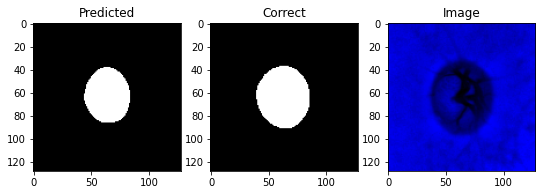

IOU: 0.7663407325744629
Dice: 0.8677156177156177
image #1


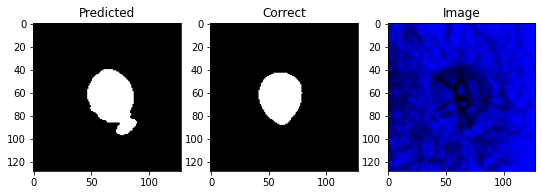

IOU: 0.572826087474823
Dice: 0.728403593642018
image #2


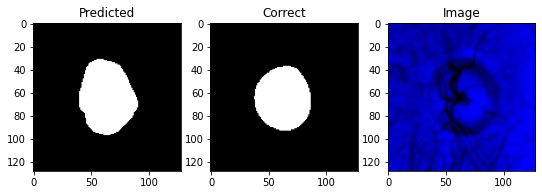

IOU: 0.8318055272102356
Dice: 0.9081810269799826
image #3


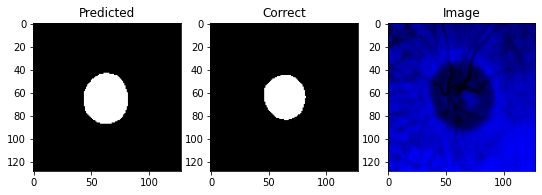

IOU: 0.8013392686843872
Dice: 0.8897149938042132
image #4


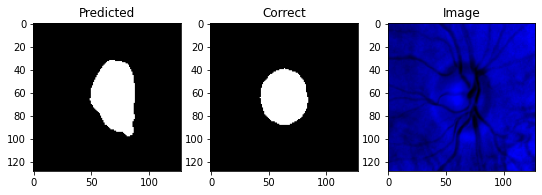

IOU: 0.5821444988250732
Dice: 0.735892961023851
image #5


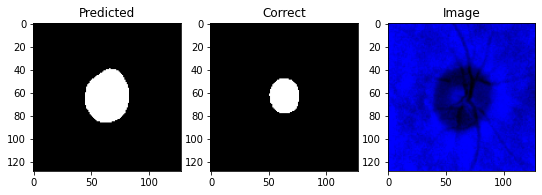

IOU: 0.45086705684661865
Dice: 0.6215139442231076
image #6


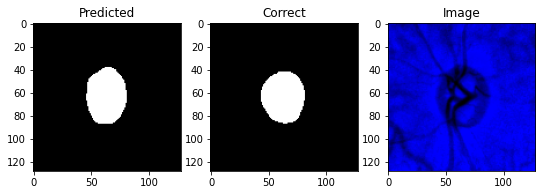

IOU: 0.8802228569984436
Dice: 0.9362962962962963
image #7


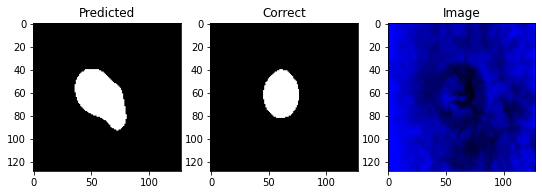

IOU: 0.5616942644119263
Dice: 0.7193396226415094
image #8


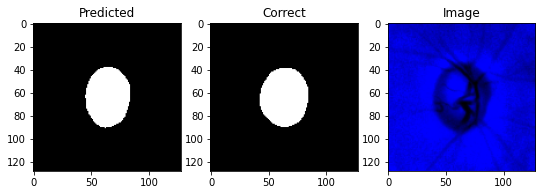

IOU: 0.9196740388870239
Dice: 0.9581564584596726
image #9


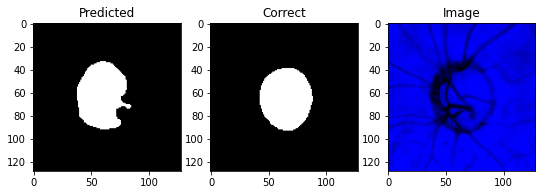

IOU: 0.6607066988945007
Dice: 0.7956934119456549
image #10


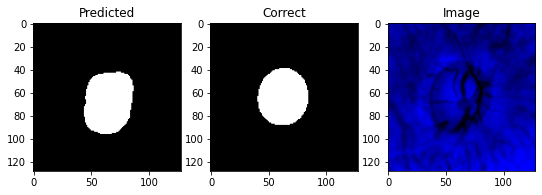

IOU: 0.7291865944862366
Dice: 0.8433868289983398
image #11


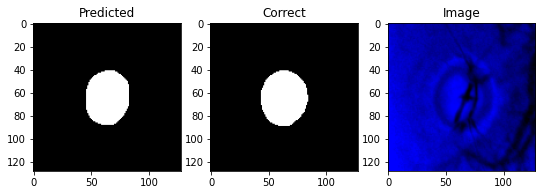

IOU: 0.9214423894882202
Dice: 0.9591152815013405
image #12


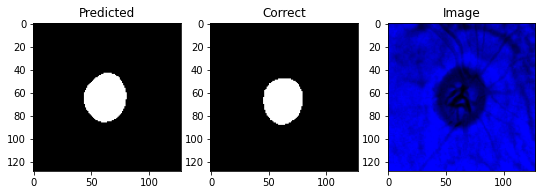

IOU: 0.8219395875930786
Dice: 0.9022687609075044
image #13


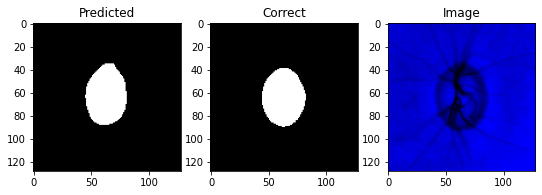

IOU: 0.8979328274726868
Dice: 0.9462219196732471
image #14


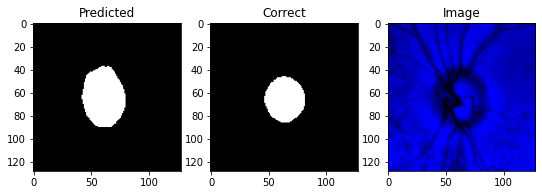

IOU: 0.6489226818084717
Dice: 0.787086856264412
image #15


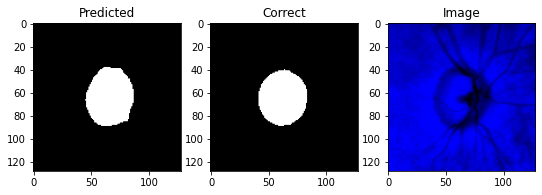

IOU: 0.7846575379371643
Dice: 0.8793368130181148
image #16


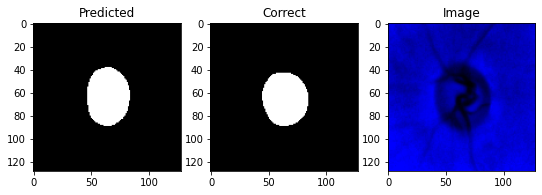

IOU: 0.8747640252113342
Dice: 0.9331990600872776
image #17


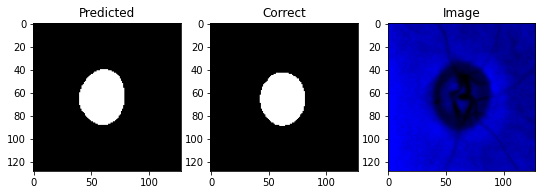

IOU: 0.8100313544273376
Dice: 0.8950467613439557
image #18


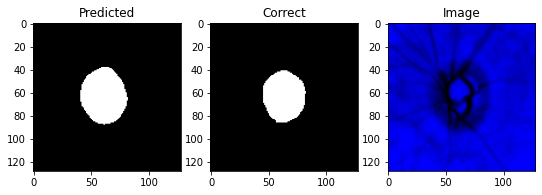

IOU: 0.7927296161651611
Dice: 0.8843827819281395
image #19


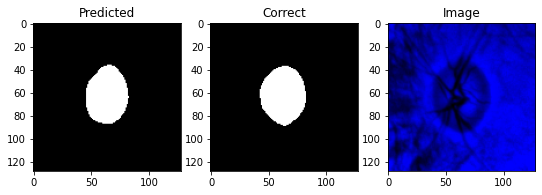

IOU: 0.906548023223877
Dice: 0.9509836612204068
image #20


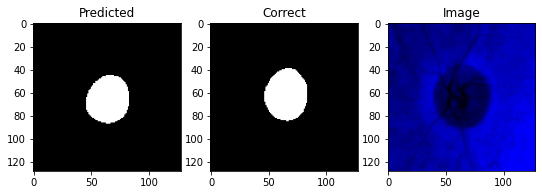

IOU: 0.7813594937324524
Dice: 0.8772619984264359
image #21


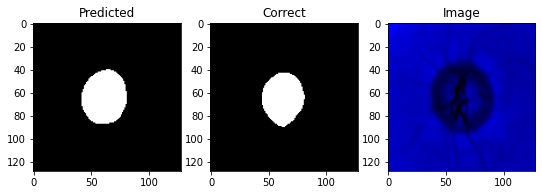

IOU: 0.8450134992599487
Dice: 0.9159970781592404
image #22


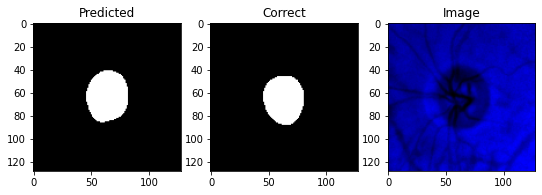

IOU: 0.8372957110404968
Dice: 0.9114435907804286
image #23


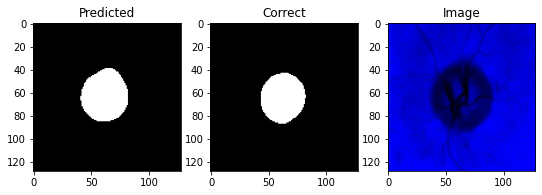

IOU: 0.8675184845924377
Dice: 0.9290601368383147
image #24


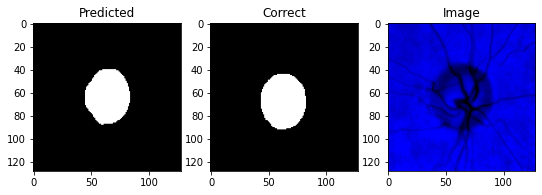

IOU: 0.7888009548187256
Dice: 0.8819326301463083
image #25


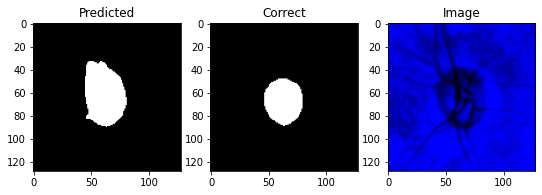

IOU: 0.6670886278152466
Dice: 0.8003037205770691
image #26


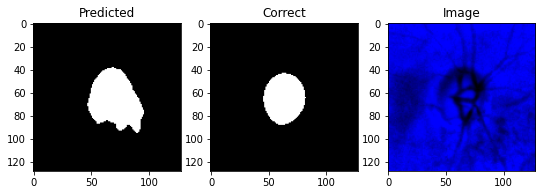

IOU: 0.6137316823005676
Dice: 0.7606365703150374
image #27


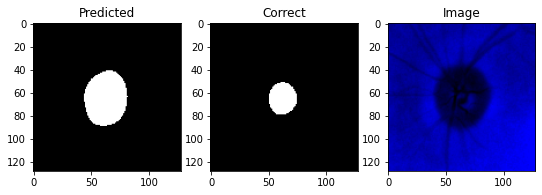

IOU: 0.3780141770839691
Dice: 0.5486361296963459
image #28


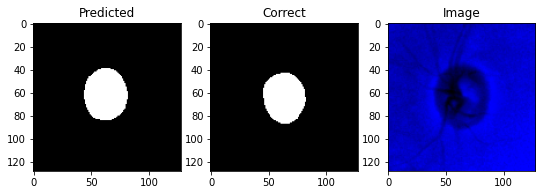

IOU: 0.8182451128959656
Dice: 0.9000382995021065
image #29


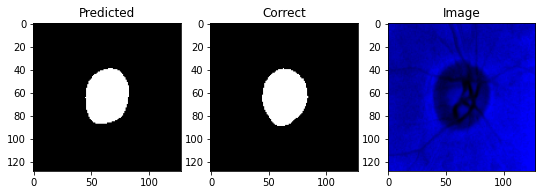

IOU: 0.9206036925315857
Dice: 0.9586607447898873
image #30


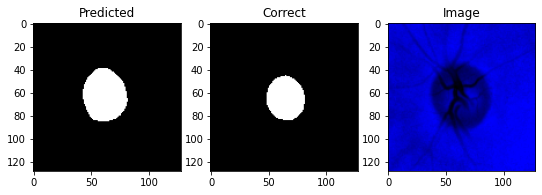

IOU: 0.6905606985092163
Dice: 0.81696053736356
image #31


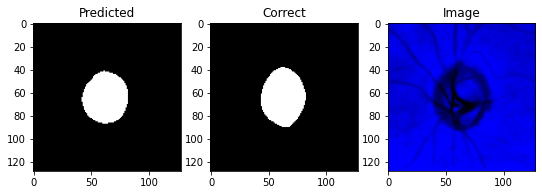

IOU: 0.884765625
Dice: 0.938860103626943
image #32


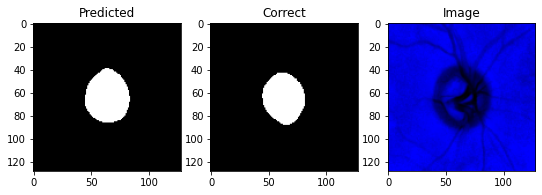

IOU: 0.8663366436958313
Dice: 0.9283819628647215
image #33


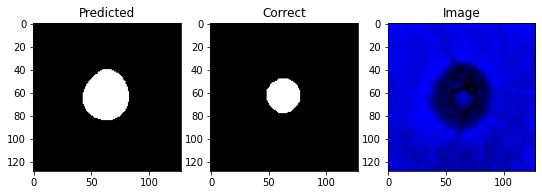

IOU: 0.5022026300430298
Dice: 0.6686217008797654
image #34


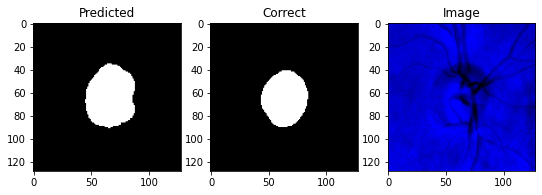

IOU: 0.7849973440170288
Dice: 0.8795501627700503
image #35


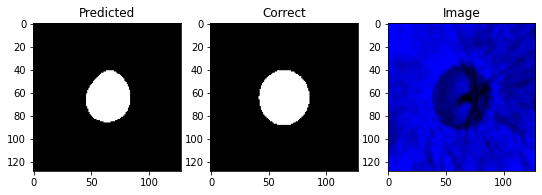

IOU: 0.8098159432411194
Dice: 0.8949152542372881
image #36


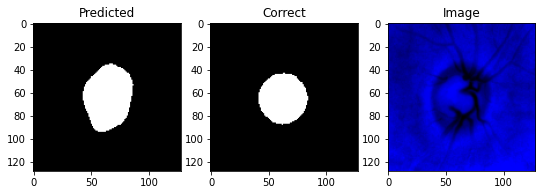

IOU: 0.7366511225700378
Dice: 0.8483582089552238
image #37


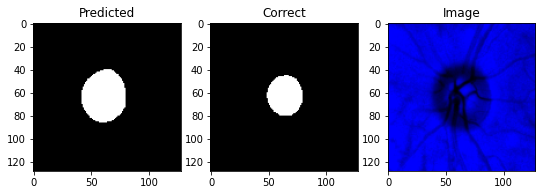

IOU: 0.616497814655304
Dice: 0.7627573858549687
image #38


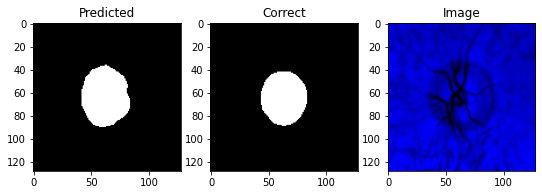

IOU: 0.8294352293014526
Dice: 0.9067664483941378
image #39


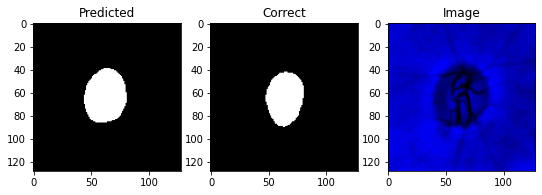

IOU: 0.7832167744636536
Dice: 0.8784313725490196
image #40


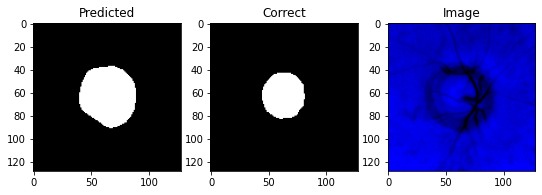

IOU: 0.5734574198722839
Dice: 0.7289137877373172
image #41


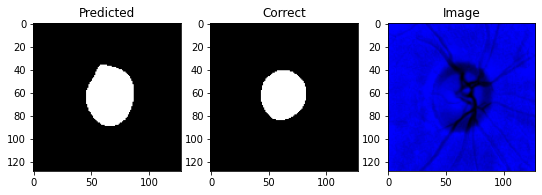

IOU: 0.7196581363677979
Dice: 0.8369781312127237
image #42


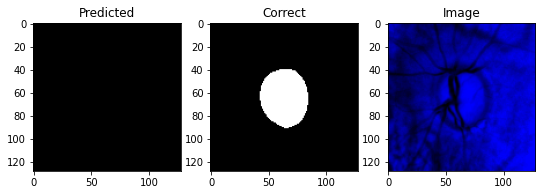

IOU: 0.0
Dice: 0.0
image #43


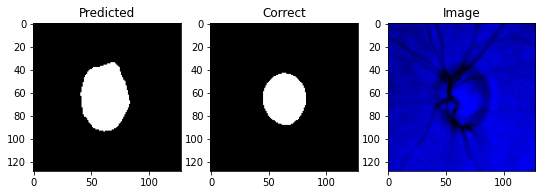

IOU: 0.675222635269165
Dice: 0.8061288305190745
image #44


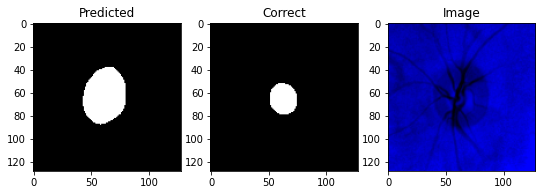

IOU: 0.35834503173828125
Dice: 0.5276200309757356
image #45


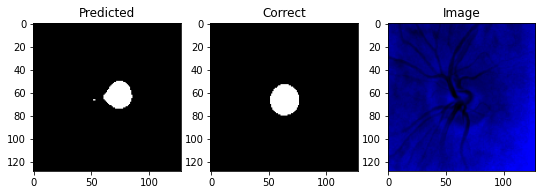

IOU: 0.3014804720878601
Dice: 0.46328852119958636
image #46


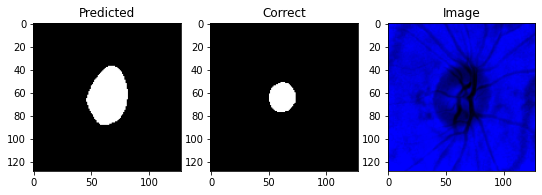

IOU: 0.35157421231269836
Dice: 0.5202440377149196
image #47


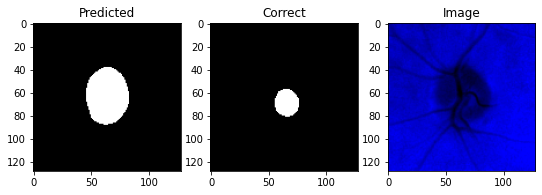

IOU: 0.27398204803466797
Dice: 0.4301191765980498
image #48


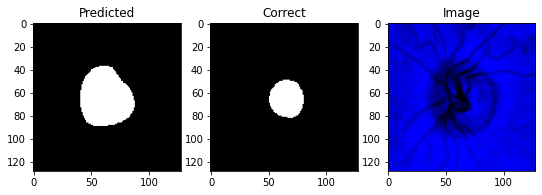

IOU: 0.4115772843360901
Dice: 0.5831452219714071
image #49


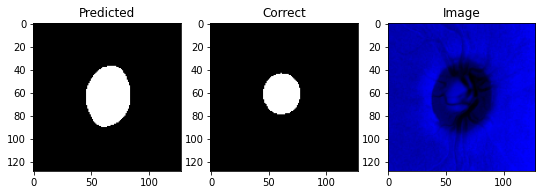

IOU: 0.5668348073959351
Dice: 0.7235412474849094
image #50


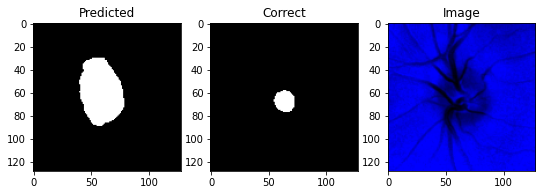

IOU: 0.15447629988193512
Dice: 0.267612772427775


In [9]:
pred_iou, pred_dice, pred_cup = predict(lab_b_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.67891246
0.7850412244361374


### Training and Test disc

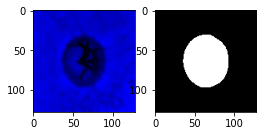

In [11]:
X_test, Z_test = next(data_generator(lab_b_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size)

history_disc = train(lab_b_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_lab_b', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 45s 431ms/step - loss: 1.0160 - mean_IOU_gpu: 0.1337 - dice_metric: 0.2346 - val_loss: 1.0051 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 42s 429ms/step - loss: 0.9976 - mean_IOU_gpu: 0.0232 - dice_metric: 0.0441 - val_loss: 0.9866 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 39s 392ms/step - loss: 0.9733 - mean_IOU_gpu: 1.6978e-04 - dice_metric: 3.3910e-04 - val_loss: 0.9739 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 38s 380ms/step - loss: 1.0018 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 0.9627 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 42s 420ms/step - loss: 0.9912 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 0.95

99/99 [==============================] - 33s 332ms/step - loss: 0.1723 - mean_IOU_gpu: 0.6972 - dice_metric: 0.8158 - val_loss: 0.7872 - val_mean_IOU_gpu: 0.1784 - val_dice_metric: 0.2754
Epoch 41/500
99/99 [==============================] - 32s 324ms/step - loss: 0.1765 - mean_IOU_gpu: 0.6883 - dice_metric: 0.8104 - val_loss: 0.6400 - val_mean_IOU_gpu: 0.2471 - val_dice_metric: 0.3659
Epoch 42/500
99/99 [==============================] - 33s 333ms/step - loss: 0.1520 - mean_IOU_gpu: 0.7196 - dice_metric: 0.8329 - val_loss: 0.5730 - val_mean_IOU_gpu: 0.3044 - val_dice_metric: 0.4346
Epoch 43/500
99/99 [==============================] - 33s 330ms/step - loss: 0.2068 - mean_IOU_gpu: 0.6710 - dice_metric: 0.7910 - val_loss: 1.4201 - val_mean_IOU_gpu: 5.7734e-04 - val_dice_metric: 0.0011
Epoch 44/500
99/99 [==============================] - 33s 331ms/step - loss: 0.1957 - mean_IOU_gpu: 0.6746 - dice_metric: 0.7966 - val_loss: 0.6424 - val_mean_IOU_gpu: 0.1981 - val_dice_metric: 0.3030
Epoc

Epoch 81/500
99/99 [==============================] - 32s 328ms/step - loss: 0.1228 - mean_IOU_gpu: 0.7629 - dice_metric: 0.8604 - val_loss: 0.2681 - val_mean_IOU_gpu: 0.5548 - val_dice_metric: 0.6920
Epoch 82/500
99/99 [==============================] - 33s 329ms/step - loss: 0.1239 - mean_IOU_gpu: 0.7544 - dice_metric: 0.8566 - val_loss: 0.1355 - val_mean_IOU_gpu: 0.7507 - val_dice_metric: 0.8409
Epoch 83/500
99/99 [==============================] - 32s 328ms/step - loss: 0.1225 - mean_IOU_gpu: 0.7594 - dice_metric: 0.8591 - val_loss: 0.1394 - val_mean_IOU_gpu: 0.7460 - val_dice_metric: 0.8373
Epoch 84/500
99/99 [==============================] - 32s 325ms/step - loss: 0.1624 - mean_IOU_gpu: 0.7098 - dice_metric: 0.8222 - val_loss: 0.2943 - val_mean_IOU_gpu: 0.5127 - val_dice_metric: 0.6562
Epoch 85/500
99/99 [==============================] - 32s 327ms/step - loss: 0.1401 - mean_IOU_gpu: 0.7400 - dice_metric: 0.8432 - val_loss: 0.2315 - val_mean_IOU_gpu: 0.5923 - val_dice_metric: 0.

Epoch 122/500
99/99 [==============================] - 32s 327ms/step - loss: 0.1029 - mean_IOU_gpu: 0.7911 - dice_metric: 0.8794 - val_loss: 0.1108 - val_mean_IOU_gpu: 0.7959 - val_dice_metric: 0.8762
Epoch 123/500
99/99 [==============================] - 32s 326ms/step - loss: 0.0960 - mean_IOU_gpu: 0.8017 - dice_metric: 0.8874 - val_loss: 0.1167 - val_mean_IOU_gpu: 0.7821 - val_dice_metric: 0.8631
Epoch 124/500
99/99 [==============================] - 33s 331ms/step - loss: 0.0989 - mean_IOU_gpu: 0.7951 - dice_metric: 0.8830 - val_loss: 0.1140 - val_mean_IOU_gpu: 0.7894 - val_dice_metric: 0.8673
Epoch 125/500
99/99 [==============================] - 33s 333ms/step - loss: 0.1062 - mean_IOU_gpu: 0.7839 - dice_metric: 0.8753 - val_loss: 0.1363 - val_mean_IOU_gpu: 0.7539 - val_dice_metric: 0.8438
Epoch 126/500
99/99 [==============================] - 33s 338ms/step - loss: 0.1043 - mean_IOU_gpu: 0.7882 - dice_metric: 0.8775 - val_loss: 0.1358 - val_mean_IOU_gpu: 0.7547 - val_dice_metri

99/99 [==============================] - 32s 326ms/step - loss: 0.1011 - mean_IOU_gpu: 0.7932 - dice_metric: 0.8812 - val_loss: 0.1469 - val_mean_IOU_gpu: 0.7228 - val_dice_metric: 0.8314
Epoch 163/500
99/99 [==============================] - 32s 324ms/step - loss: 0.0947 - mean_IOU_gpu: 0.7997 - dice_metric: 0.8864 - val_loss: 0.1495 - val_mean_IOU_gpu: 0.7192 - val_dice_metric: 0.8287
Epoch 164/500
99/99 [==============================] - 32s 324ms/step - loss: 0.0895 - mean_IOU_gpu: 0.8152 - dice_metric: 0.8946 - val_loss: 0.1886 - val_mean_IOU_gpu: 0.6656 - val_dice_metric: 0.7892
Epoch 165/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0962 - mean_IOU_gpu: 0.8023 - dice_metric: 0.8873 - val_loss: 0.1682 - val_mean_IOU_gpu: 0.6929 - val_dice_metric: 0.8097
Epoch 166/500
99/99 [==============================] - 32s 326ms/step - loss: 0.0774 - mean_IOU_gpu: 0.8321 - dice_metric: 0.9064 - val_loss: 0.1432 - val_mean_IOU_gpu: 0.7274 - val_dice_metric: 0.8339
Epoc

Epoch 203/500
99/99 [==============================] - 34s 340ms/step - loss: 0.0776 - mean_IOU_gpu: 0.8331 - dice_metric: 0.9069 - val_loss: 0.1575 - val_mean_IOU_gpu: 0.6997 - val_dice_metric: 0.8151
Epoch 204/500
99/99 [==============================] - 33s 329ms/step - loss: 0.0799 - mean_IOU_gpu: 0.8310 - dice_metric: 0.9049 - val_loss: 0.2051 - val_mean_IOU_gpu: 0.6374 - val_dice_metric: 0.7699
Epoch 205/500
99/99 [==============================] - 32s 327ms/step - loss: 0.0944 - mean_IOU_gpu: 0.8027 - dice_metric: 0.8878 - val_loss: 0.1798 - val_mean_IOU_gpu: 0.6708 - val_dice_metric: 0.7951
Epoch 206/500
99/99 [==============================] - 32s 328ms/step - loss: 0.0692 - mean_IOU_gpu: 0.8468 - dice_metric: 0.9158 - val_loss: 0.1362 - val_mean_IOU_gpu: 0.7281 - val_dice_metric: 0.8348
Epoch 207/500
99/99 [==============================] - 32s 328ms/step - loss: 0.0827 - mean_IOU_gpu: 0.8256 - dice_metric: 0.9015 - val_loss: 0.1346 - val_mean_IOU_gpu: 0.7311 - val_dice_metri

99/99 [==============================] - 33s 328ms/step - loss: 0.0614 - mean_IOU_gpu: 0.8608 - dice_metric: 0.9239 - val_loss: 0.1501 - val_mean_IOU_gpu: 0.7050 - val_dice_metric: 0.8228
Epoch 244/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0701 - mean_IOU_gpu: 0.8458 - dice_metric: 0.9145 - val_loss: 0.1363 - val_mean_IOU_gpu: 0.7243 - val_dice_metric: 0.8348
Epoch 245/500
99/99 [==============================] - 33s 329ms/step - loss: 0.0668 - mean_IOU_gpu: 0.8507 - dice_metric: 0.9179 - val_loss: 0.1805 - val_mean_IOU_gpu: 0.6644 - val_dice_metric: 0.7915
Epoch 246/500
99/99 [==============================] - 32s 325ms/step - loss: 0.0654 - mean_IOU_gpu: 0.8567 - dice_metric: 0.9210 - val_loss: 0.1540 - val_mean_IOU_gpu: 0.6989 - val_dice_metric: 0.8162
Epoch 247/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0678 - mean_IOU_gpu: 0.8474 - dice_metric: 0.9163 - val_loss: 0.1558 - val_mean_IOU_gpu: 0.6969 - val_dice_metric: 0.8142
Epoc

Epoch 284/500
99/99 [==============================] - 32s 325ms/step - loss: 0.0502 - mean_IOU_gpu: 0.8818 - dice_metric: 0.9364 - val_loss: 0.1433 - val_mean_IOU_gpu: 0.7186 - val_dice_metric: 0.8289
Epoch 285/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0584 - mean_IOU_gpu: 0.8688 - dice_metric: 0.9282 - val_loss: 0.1472 - val_mean_IOU_gpu: 0.7113 - val_dice_metric: 0.8257
Epoch 286/500
99/99 [==============================] - 32s 326ms/step - loss: 0.0588 - mean_IOU_gpu: 0.8680 - dice_metric: 0.9279 - val_loss: 0.1314 - val_mean_IOU_gpu: 0.7355 - val_dice_metric: 0.8409
Epoch 287/500
99/99 [==============================] - 33s 334ms/step - loss: 0.0574 - mean_IOU_gpu: 0.8684 - dice_metric: 0.9282 - val_loss: 0.1440 - val_mean_IOU_gpu: 0.7167 - val_dice_metric: 0.8279
Epoch 288/500
99/99 [==============================] - 32s 328ms/step - loss: 0.0566 - mean_IOU_gpu: 0.8729 - dice_metric: 0.9304 - val_loss: 0.1370 - val_mean_IOU_gpu: 0.7271 - val_dice_metri

99/99 [==============================] - 32s 326ms/step - loss: 0.0509 - mean_IOU_gpu: 0.8812 - dice_metric: 0.9360 - val_loss: 0.1341 - val_mean_IOU_gpu: 0.7335 - val_dice_metric: 0.8389
Epoch 325/500
99/99 [==============================] - 33s 336ms/step - loss: 0.0557 - mean_IOU_gpu: 0.8715 - dice_metric: 0.9305 - val_loss: 0.1379 - val_mean_IOU_gpu: 0.7279 - val_dice_metric: 0.8356
Epoch 326/500
99/99 [==============================] - 34s 340ms/step - loss: 0.0501 - mean_IOU_gpu: 0.8849 - dice_metric: 0.9377 - val_loss: 0.1400 - val_mean_IOU_gpu: 0.7264 - val_dice_metric: 0.8338
Epoch 327/500
99/99 [==============================] - 32s 327ms/step - loss: 0.0529 - mean_IOU_gpu: 0.8785 - dice_metric: 0.9342 - val_loss: 0.1742 - val_mean_IOU_gpu: 0.6808 - val_dice_metric: 0.8019
Epoch 328/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0549 - mean_IOU_gpu: 0.8741 - dice_metric: 0.9317 - val_loss: 0.1514 - val_mean_IOU_gpu: 0.7098 - val_dice_metric: 0.8239
Epoc

Epoch 365/500
99/99 [==============================] - 33s 329ms/step - loss: 0.0491 - mean_IOU_gpu: 0.8847 - dice_metric: 0.9379 - val_loss: 0.1317 - val_mean_IOU_gpu: 0.7390 - val_dice_metric: 0.8435
Epoch 366/500
99/99 [==============================] - 33s 328ms/step - loss: 0.0461 - mean_IOU_gpu: 0.8910 - dice_metric: 0.9416 - val_loss: 0.1615 - val_mean_IOU_gpu: 0.6990 - val_dice_metric: 0.8163
Epoch 367/500
99/99 [==============================] - 33s 331ms/step - loss: 0.0479 - mean_IOU_gpu: 0.8877 - dice_metric: 0.9397 - val_loss: 0.1502 - val_mean_IOU_gpu: 0.7140 - val_dice_metric: 0.8267
Epoch 368/500
99/99 [==============================] - 33s 329ms/step - loss: 0.0489 - mean_IOU_gpu: 0.8869 - dice_metric: 0.9389 - val_loss: 0.1474 - val_mean_IOU_gpu: 0.7172 - val_dice_metric: 0.8297
Epoch 369/500
99/99 [==============================] - 32s 327ms/step - loss: 0.0544 - mean_IOU_gpu: 0.8747 - dice_metric: 0.9321 - val_loss: 0.1664 - val_mean_IOU_gpu: 0.6924 - val_dice_metri

99/99 [==============================] - 34s 343ms/step - loss: 0.0480 - mean_IOU_gpu: 0.8875 - dice_metric: 0.9395 - val_loss: 0.1431 - val_mean_IOU_gpu: 0.7247 - val_dice_metric: 0.8340
Epoch 406/500
99/99 [==============================] - 32s 327ms/step - loss: 0.0430 - mean_IOU_gpu: 0.8968 - dice_metric: 0.9451 - val_loss: 0.1541 - val_mean_IOU_gpu: 0.7110 - val_dice_metric: 0.8245
Epoch 407/500
99/99 [==============================] - 33s 337ms/step - loss: 0.0573 - mean_IOU_gpu: 0.8732 - dice_metric: 0.9302 - val_loss: 0.1617 - val_mean_IOU_gpu: 0.6998 - val_dice_metric: 0.8176
Epoch 408/500
99/99 [==============================] - 32s 326ms/step - loss: 0.0531 - mean_IOU_gpu: 0.8777 - dice_metric: 0.9334 - val_loss: 0.1283 - val_mean_IOU_gpu: 0.7439 - val_dice_metric: 0.8483
Epoch 409/500
99/99 [==============================] - 32s 326ms/step - loss: 0.0461 - mean_IOU_gpu: 0.8913 - dice_metric: 0.9418 - val_loss: 0.1402 - val_mean_IOU_gpu: 0.7283 - val_dice_metric: 0.8371
Epoc

Epoch 446/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0473 - mean_IOU_gpu: 0.8907 - dice_metric: 0.9409 - val_loss: 0.1343 - val_mean_IOU_gpu: 0.7369 - val_dice_metric: 0.8436
Epoch 447/500
99/99 [==============================] - 32s 324ms/step - loss: 0.0460 - mean_IOU_gpu: 0.8917 - dice_metric: 0.9419 - val_loss: 0.1431 - val_mean_IOU_gpu: 0.7245 - val_dice_metric: 0.8349
Epoch 448/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0494 - mean_IOU_gpu: 0.8838 - dice_metric: 0.9375 - val_loss: 0.1378 - val_mean_IOU_gpu: 0.7320 - val_dice_metric: 0.8403
Epoch 449/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0464 - mean_IOU_gpu: 0.8909 - dice_metric: 0.9414 - val_loss: 0.1249 - val_mean_IOU_gpu: 0.7492 - val_dice_metric: 0.8527
Epoch 450/500
99/99 [==============================] - 33s 330ms/step - loss: 0.0473 - mean_IOU_gpu: 0.8872 - dice_metric: 0.9397 - val_loss: 0.1438 - val_mean_IOU_gpu: 0.7236 - val_dice_metri

99/99 [==============================] - 32s 324ms/step - loss: 0.0505 - mean_IOU_gpu: 0.8837 - dice_metric: 0.9369 - val_loss: 0.1133 - val_mean_IOU_gpu: 0.7655 - val_dice_metric: 0.8640
Epoch 487/500
99/99 [==============================] - 32s 327ms/step - loss: 0.0459 - mean_IOU_gpu: 0.8921 - dice_metric: 0.9420 - val_loss: 0.1171 - val_mean_IOU_gpu: 0.7610 - val_dice_metric: 0.8611
Epoch 488/500
99/99 [==============================] - 33s 329ms/step - loss: 0.0478 - mean_IOU_gpu: 0.8878 - dice_metric: 0.9397 - val_loss: 0.1201 - val_mean_IOU_gpu: 0.7560 - val_dice_metric: 0.8578
Epoch 489/500
99/99 [==============================] - 34s 342ms/step - loss: 0.0485 - mean_IOU_gpu: 0.8863 - dice_metric: 0.9387 - val_loss: 0.1210 - val_mean_IOU_gpu: 0.7556 - val_dice_metric: 0.8576
Epoch 490/500
99/99 [==============================] - 33s 334ms/step - loss: 0.0417 - mean_IOU_gpu: 0.9014 - dice_metric: 0.9474 - val_loss: 0.1452 - val_mean_IOU_gpu: 0.7211 - val_dice_metric: 0.8339
Epoc

image #0


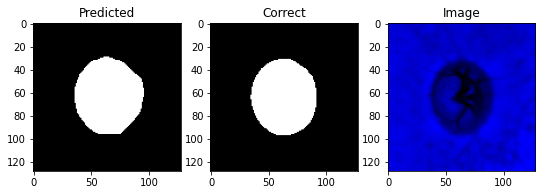

IOU: 0.9278448820114136
Dice: 0.9625721352019786
image #1


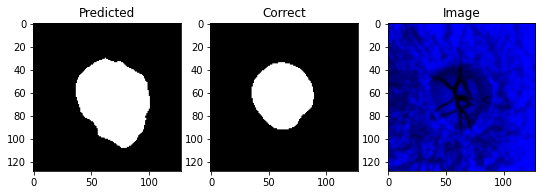

IOU: 0.6392157077789307
Dice: 0.7799043062200957
image #2


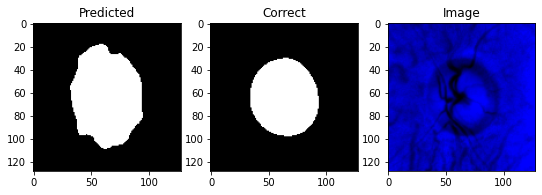

IOU: 0.7485727667808533
Dice: 0.856210039450415
image #3


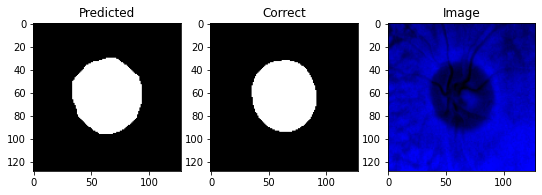

IOU: 0.8930429220199585
Dice: 0.9434999141336081
image #4


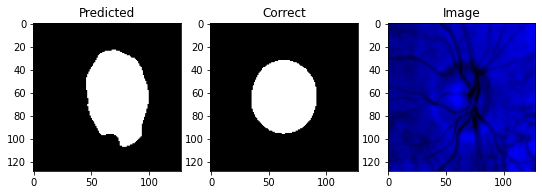

IOU: 0.6007711887359619
Dice: 0.7506022161554521
image #5


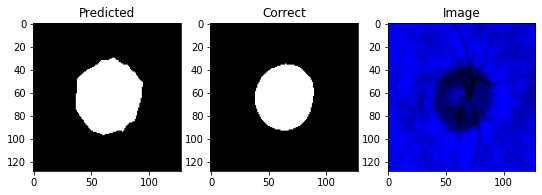

IOU: 0.7918975353240967
Dice: 0.883864734299517
image #6


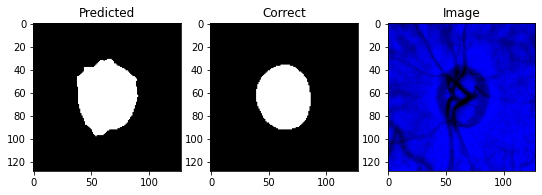

IOU: 0.8095422983169556
Dice: 0.8947481243301179
image #7


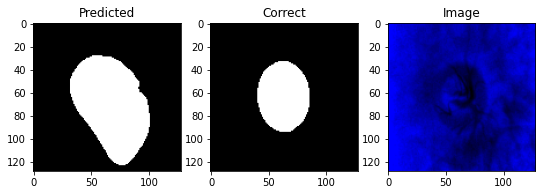

IOU: 0.4954586625099182
Dice: 0.6626176738536289
image #8


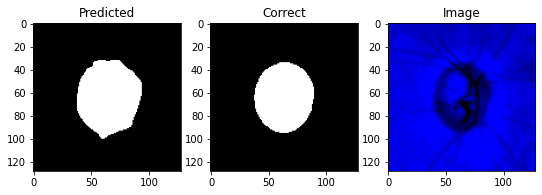

IOU: 0.8590369820594788
Dice: 0.9241741741741741
image #9


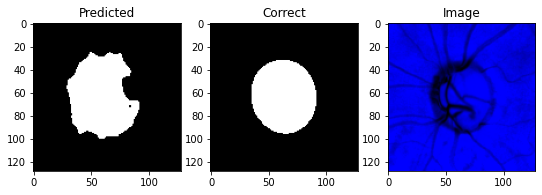

IOU: 0.7193323969841003
Dice: 0.8367578061802298
image #10


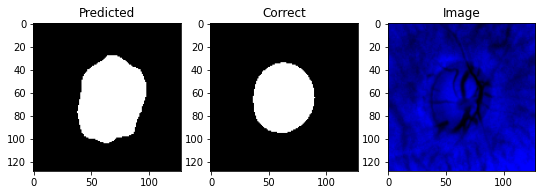

IOU: 0.7058991193771362
Dice: 0.8275977280320749
image #11


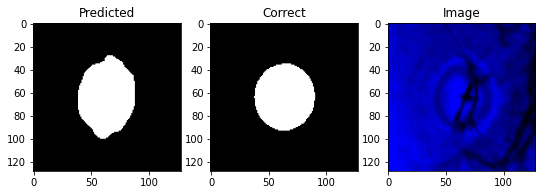

IOU: 0.85321444272995
Dice: 0.9207940645678765
image #12


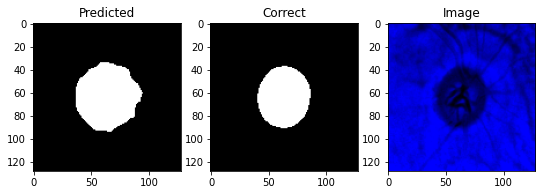

IOU: 0.7595887780189514
Dice: 0.863370786516854
image #13


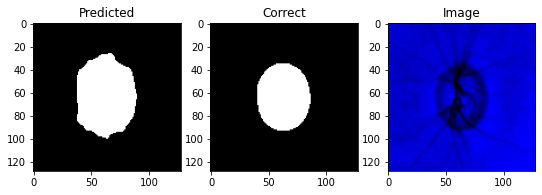

IOU: 0.7314595580101013
Dice: 0.8449051437512224
image #14


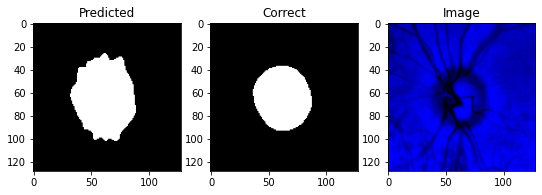

IOU: 0.7163742780685425
Dice: 0.8347529812606473
image #15


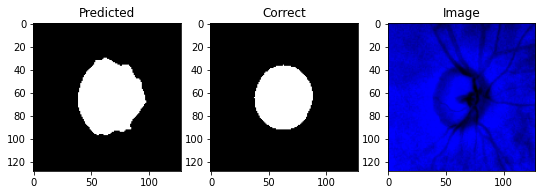

IOU: 0.7640684843063354
Dice: 0.8662571824846443
image #16


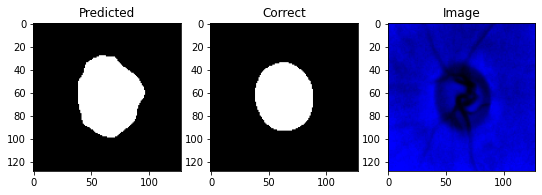

IOU: 0.7851925492286682
Dice: 0.8796726799330482
image #17


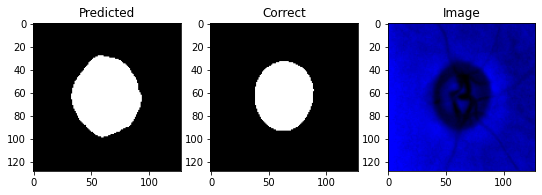

IOU: 0.7694524526596069
Dice: 0.8697068403908795
image #18


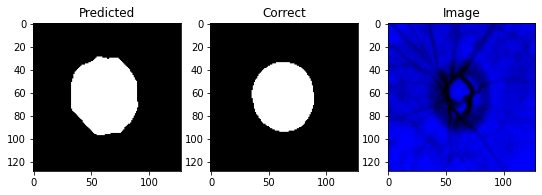

IOU: 0.8224661350250244
Dice: 0.9025859015232023
image #19


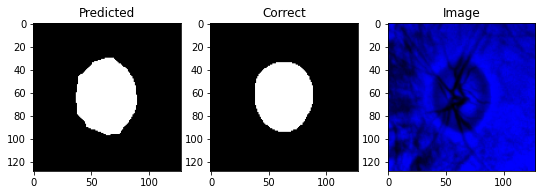

IOU: 0.8979366421699524
Dice: 0.9462240341681227
image #20


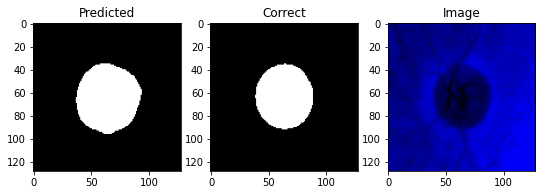

IOU: 0.836121678352356
Dice: 0.9107475667840133
image #21


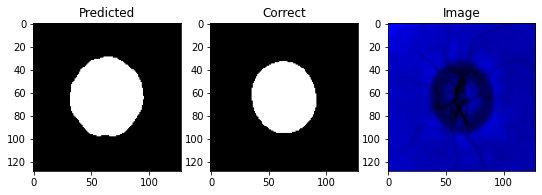

IOU: 0.8070226907730103
Dice: 0.8932070542129327
image #22


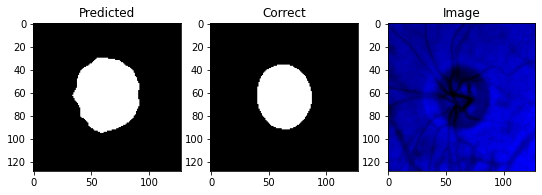

IOU: 0.7460657954216003
Dice: 0.8545678000819337
image #23


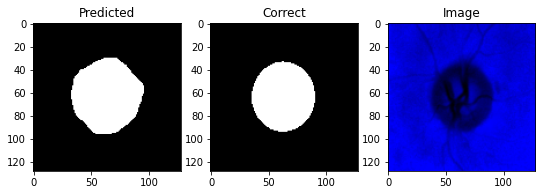

IOU: 0.8396501541137695
Dice: 0.9128367670364501
image #24


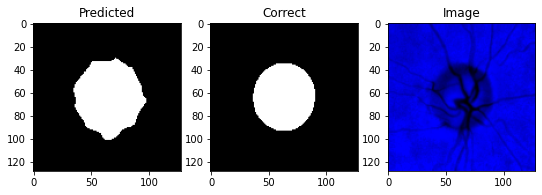

IOU: 0.8060429096221924
Dice: 0.8926065839179709
image #25


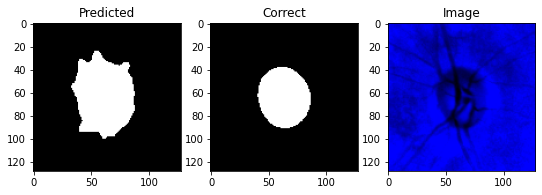

IOU: 0.6420764923095703
Dice: 0.7820299500831946
image #26


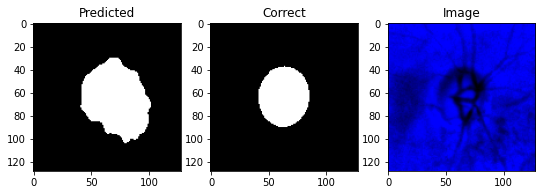

IOU: 0.5831696391105652
Dice: 0.7367114788004137
image #27


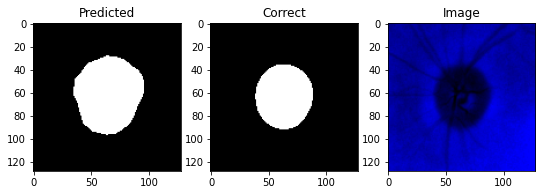

IOU: 0.7028151154518127
Dice: 0.8254743565658463
image #28


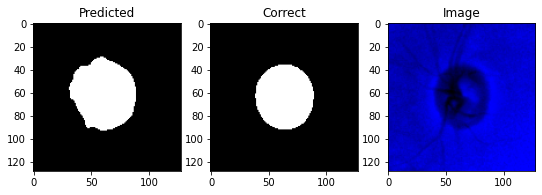

IOU: 0.8050200343132019
Dice: 0.8919790407093914
image #29


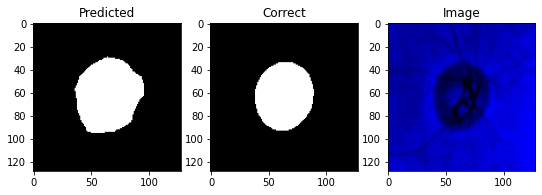

IOU: 0.8073644638061523
Dice: 0.8934163365402754
image #30


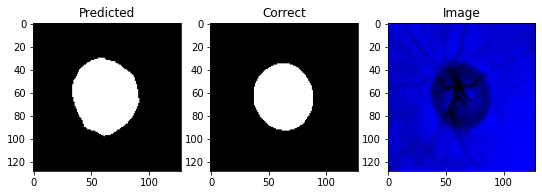

IOU: 0.8071206212043762
Dice: 0.8932670237184391
image #31


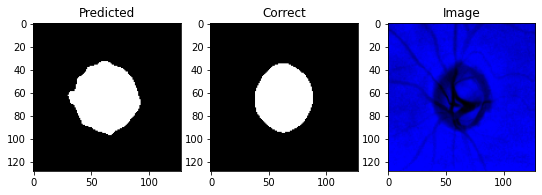

IOU: 0.8379374146461487
Dice: 0.9118236472945892
image #32


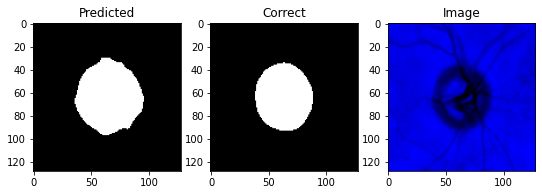

IOU: 0.8044770956039429
Dice: 0.8916456677650707
image #33


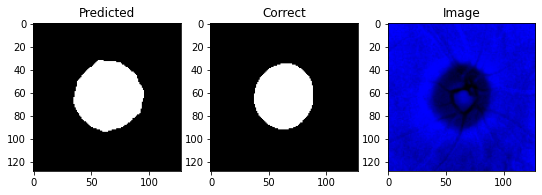

IOU: 0.8146828413009644
Dice: 0.8978790259230165
image #34


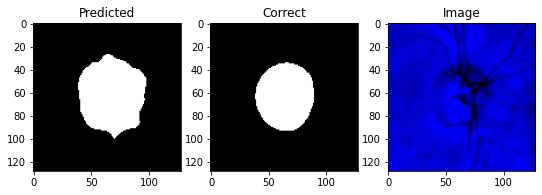

IOU: 0.7508805394172668
Dice: 0.8577176298463789
image #35


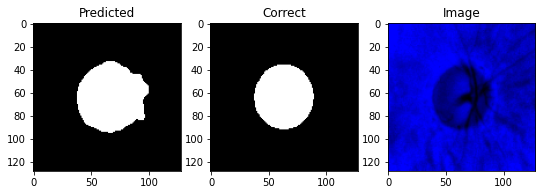

IOU: 0.7900455594062805
Dice: 0.8827100058742902
image #36


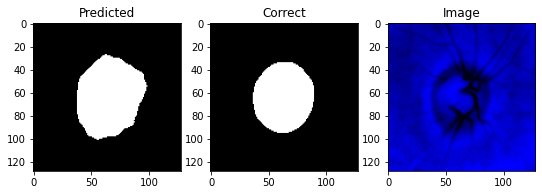

IOU: 0.7779141068458557
Dice: 0.8750862663906143
image #37


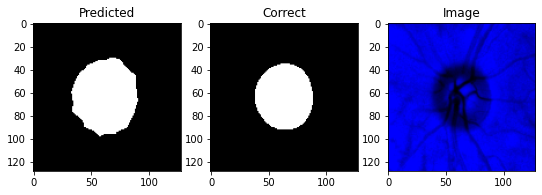

IOU: 0.7731292247772217
Dice: 0.8720506426242087
image #38


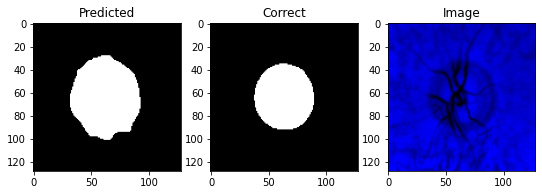

IOU: 0.7013493180274963
Dice: 0.8244624603454354
image #39


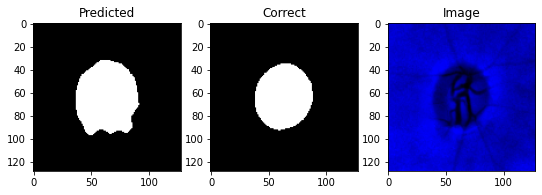

IOU: 0.8005738854408264
Dice: 0.8892430278884462
image #40


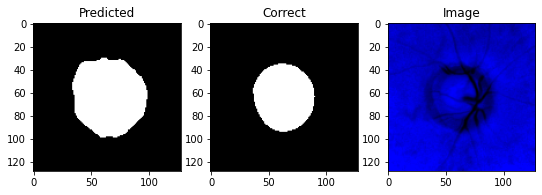

IOU: 0.6976142525672913
Dice: 0.8218760582458516
image #41


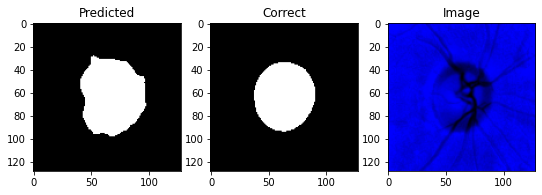

IOU: 0.7532716393470764
Dice: 0.859275441470963
image #42


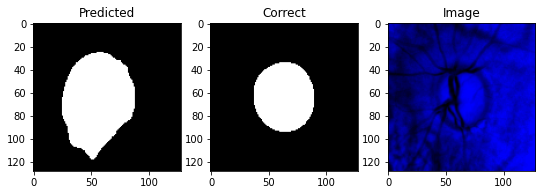

IOU: 0.5716646909713745
Dice: 0.7274639423076923
image #43


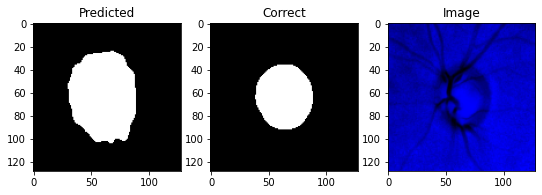

IOU: 0.5929512977600098
Dice: 0.7444688397230198
image #44


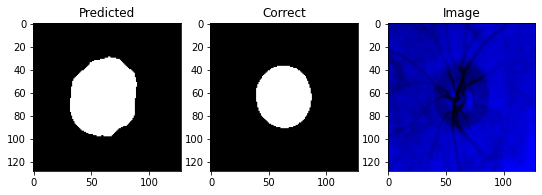

IOU: 0.653022050857544
Dice: 0.7900947958986264
image #45


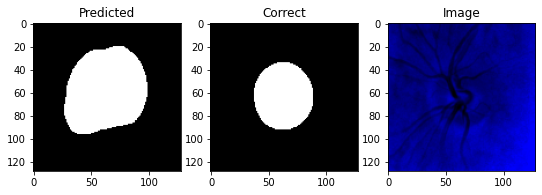

IOU: 0.5470560789108276
Dice: 0.7072220557386875
image #46


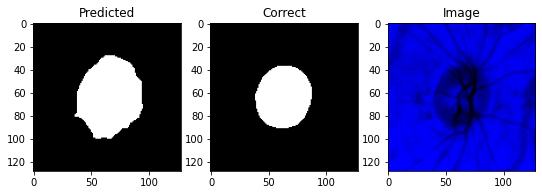

IOU: 0.6828870177268982
Dice: 0.8115660780128081
image #47


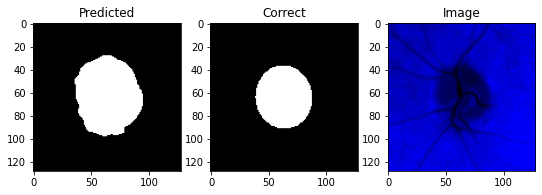

IOU: 0.6730892658233643
Dice: 0.8046065259117082
image #48


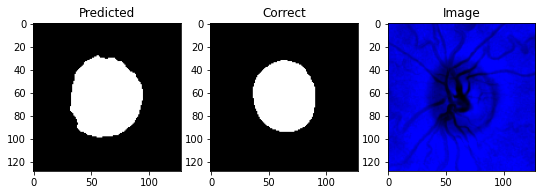

IOU: 0.7781669497489929
Dice: 0.8752462245567958
image #49


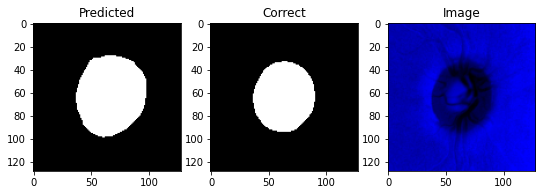

IOU: 0.7612960934638977
Dice: 0.8644725738396625
image #50


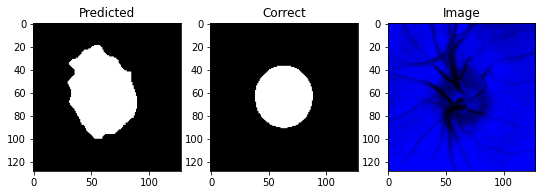

IOU: 0.6236686110496521
Dice: 0.7682215743440233


In [13]:
pred_iou, pred_dice, pred_disc = predict(lab_b_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.74624544
0.851270488413344


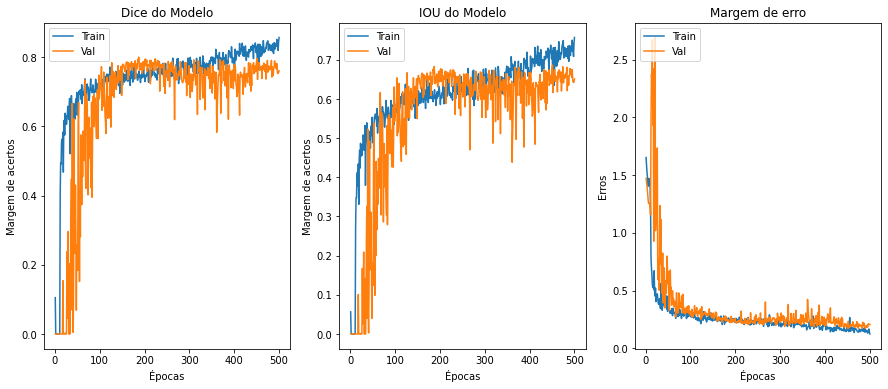

In [15]:
plot_results(history_cup, epochs)

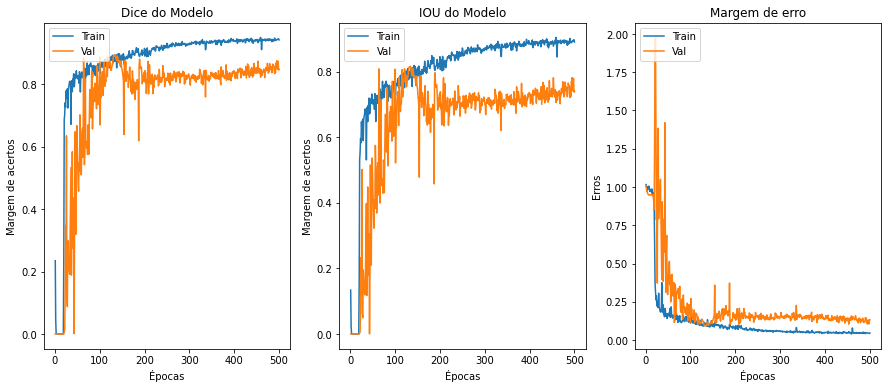

In [16]:
plot_results(history_disc, epochs)

In [17]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

image #0 - cdr = 0.7257535741521826
image #1 - cdr = 0.7460510503111312
image #2 - cdr = 0.7495100432115483
image #3 - cdr = 0.6775671718649191
image #4 - cdr = 0.8040842535506681
image #5 - cdr = 0.720584366606354
image #6 - cdr = 0.7773861211067129
image #7 - cdr = 0.595235094013614
image #8 - cdr = 0.7942912065856553
image #9 - cdr = 0.7827240980219372
image #10 - cdr = 0.7504284029567767
image #11 - cdr = 0.7041899559964239
image #12 - cdr = 0.7245630385757815
image #13 - cdr = 0.7473210156022626
image #14 - cdr = 0.7181998622694137
image #15 - cdr = 0.8008074038303674
image #16 - cdr = 0.7385749912077368
image #17 - cdr = 0.7044263599143524
image #18 - cdr = 0.721258214920096
image #19 - cdr = 0.7722268590830779
image #20 - cdr = 0.704546279408062
image #21 - cdr = 0.6903946947264019
image #22 - cdr = 0.7068419194674237
image #23 - cdr = 0.7069222307926363
image #24 - cdr = 0.7154734968473768
image #25 - cdr = 0.8006243312417697
image #26 - cdr = 0.7934077476193819
image #27 - cdr

In [18]:
pd.DataFrame(data= result)

cdr      area
0   0.725754  0.480168
1   0.746051  0.456245
2   0.749510  0.584681
3   0.677567  0.434655
4   0.804084  0.555982
5   0.720584  0.479224
6   0.777386  0.527541
7   0.595235  0.350363
8   0.794291  0.557572
9   0.782724  0.589136
10  0.750428  0.553322
11  0.704190  0.552793
12  0.724563  0.476473
13  0.747321  0.497799
14  0.718200  0.498376
15  0.800807  0.581672
16  0.738575  0.500996
17  0.704426  0.472622
18  0.721258  0.490639
19  0.772227  0.533898
20  0.704546  0.467607
21  0.690395  0.429330
22  0.706842  0.461731
23  0.706922  0.472627
24  0.715473  0.468811
25  0.800624  0.539276
26  0.793408  0.607001
27  0.712065  0.451056
28  0.731544  0.498524
29  0.739139  0.493011
30  0.707736  0.478050
31  0.741009  0.512339
32  0.724907  0.486884
33  0.724645  0.485388
34  0.815550  0.599936
35  0.724926  0.463158
36  0.801483  0.584848
37  0.691560  0.470068
38  0.743415  0.517541
39  0.725874  0.490309
40  0.765685  0.586950
41  0.764217  0.560717
42  0.000000  0.000000
43  0.729862  0.512510
44  0.719077  0.456028
45  0.296732  0.100907
46  0.718090  0.435663
47  0.718891  0.465318
48  0.753402  0.549621
49  0.741897  0.471743
50  0.764916  0.506520

In [19]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm  disc - dM
0   39.424305  48.312435  59.831226  66.568649
1   37.956863  57.290337  59.881611  76.791443
2   48.632103  65.728409  61.790577  87.695168
3   38.657043  44.300808  60.425167  65.382164
4   38.311275  66.159966  53.017479  82.279892
5   38.172745  46.560486  57.550224  64.614899
6   35.104107  49.622162  52.706711  63.832066
7   34.747013  58.868488  58.597206  98.899559
8   38.678024  52.913792  55.560871  66.617622
9   43.943699  59.466148  59.281506  75.973320
10  42.551975  57.520035  57.678326  76.649597
11  38.284851  48.326981  49.162655  68.627762
12  36.392654  42.643665  55.584934  58.854321
13  35.405685  53.462719  53.303490  71.539162
14  37.061874  53.031651  54.180630  73.839684
15  40.981819  51.987236  57.051426  64.918526
16  37.631817  51.399437  56.440414  69.592712
17  39.269543  48.211716  58.724174  68.441101
18  39.949680  48.975239  58.741257  67.902504
19  36.705780  50.887772  53.054417  65.897438
20  37.064819  42.505703  55.809761  60.330605
21  39.129765  47.541996  63.150604  68.862053
22  36.381031  45.386395  55.961819  64.210106
23  40.654228  46.051006  61.263355  65.142960
24  38.806133  47.948357  59.484776  67.016258
25  35.953003  58.398994  53.481544  72.941818
26  43.543232  57.683277  54.747795  72.703194
27  37.242683  48.423412  59.288273  68.004211
28  37.842812  45.672096  55.908314  62.432442
29  37.532722  49.297375  56.662952  66.695694
30  38.193623  46.556175  56.639275  65.781883
31  39.549503  45.016247  57.867752  60.749931
32  38.598324  46.414982  57.607948  64.028854
33  39.750229  44.023632  59.436157  60.752003
34  43.367607  55.574421  59.239822  68.143471
35  37.903484  44.806450  59.686680  61.808292
36  41.965733  58.396721  57.812927  72.860840
37  38.575134  45.943760  56.876339  66.434959
38  42.006351  52.848602  60.339668  71.088966
39  36.580894  47.755630  55.215225  65.790520
40  48.994579  53.669285  64.081390  70.093201
41  41.022133  52.943882  57.036011  69.278625
42   0.000000   0.000000   0.000000   0.000000
43  41.502155  59.161201  59.233547  81.058060
44  36.707565  49.926208  57.841328  69.431007
45  23.281771  24.384590  67.708176  82.177139
46  33.804581  50.772652  56.084824  70.705132
47  37.196262  49.959866  57.655266  69.495766
48  46.510014  52.976440  62.646294  70.316277
49  38.205917  53.151424  60.235912  71.642639
50  36.997696  60.148525  55.971024  78.634193